In [1]:
from IPython.display import Image

소프트웨어와 하드웨어가 결합된 상태로 구현될 수 있고, 그 형태는 부품, 모듈, 부 등이 있다.  

생체 신호 측정 시스템은 **신체에 착용할 의복에 복수의 전극을 결합하고 전극을 의복에 일체화한 버전** 과**전극의 탈착이 가능한 버전** 이 있다. 또한 **상의와 하의로 분리되어 있을 수도** 있고, **상의와 하의가 이어져 있을 수도** 있다.

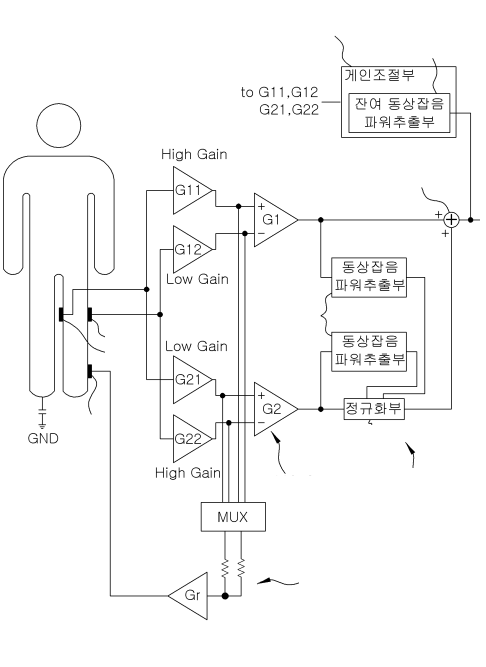

In [2]:
Image("C:/Users/jy990/Study/EMG/Image/2.1.PNG")

# 생체신호 계측모듈

2개의 전극으로부터 신호를 입력받아 증폭기로 불평형하게 증폭한 후 차동 연산하되, 상대적으로 크게 증폭하는 검출 신호를 서로 다르게 해 측정한다. 그리고 그 신호에 섞인 잡음이 동일하게 유지되도록 정규화해야 하고, 정규화한 신호를 합성해 생체 신호를 휙득하며, 생체 신호에 섞인 잡음이 최소화되도록 증폭기의 증폭도를 조절하고, 잡음 신호를 추출해 reference 전극으로 인체에 인가하는 방식을 활용한다.

2개의 전극은 전위 신호를 검출하기 위해 이용된다. 이 검출 신호의 차이에 의해 생체 신호가 검출되고, 생체 신호는 양자 검출 신호를 차동 연산해 얻을 수 있다. 그런데 전극에 잡음이 유입될 수 있는데, 생체 신호에 비해 상대적으로 큰 파워를 갖고 있으므로 억제해야 한다.  

하지만 1전극과 2전극의 인체와 접촉된 임피던스가 상이할 수 있고, 신호 전달 경로에서도 임피던스 차이가 날 수 있다. 이런 임피던스 불평형은 잡음을 억제시키는 차동 연산을 해도 살아남는다. 특히 운동하는 사람은 접촉 임피던스가 수시로 변하기에, 2개의 검출부를 구비해서 이 문제를 해소하기로 한다.(1전극과 2전극 외에 래퍼런스 전극도 있다)  

잡음으로 검출되는 신호를 반전 증폭한 후, 래퍼런스 전극을 통해 20dB 이상의 잡음을 억제할 수 있게 만드는 구성 요소를 추가할 수 있다. 하지만 꼭 그렇게 하지 않아도 된다.  

여기서는 **1전극과 2전극의 신호를 불평등하게 각각 증폭**한 뒤 차동 연산하는 검출부를 1검출부와 2검출부로 나눈다. 그리고 **두 개의 검출부 내에서 상대적으로 크게 증폭하는 검출 신호를 서로 다르게 만든다.** 즉 서로 반대되게 불평등을 키운 후 차동 연산해 생성되는 신호를 출력한다. 그러면 임피던스 불평형의 영향과 별개로 각각 증폭기의 증폭도 차이에 따른 불평형 영향을 검출 신호에게 줄 수 있고, 증폭의 차이가 반대되게 만들어서 불평형 영향이 서로 반대되게 나타나는 신호를 출력할 수 있다.

예를 들어, 1검출부는 1전극 신호를 2전극 신호보다 큰 증폭도로 증폭한 후 차동 연산기로 차동 연산해 출력하고, 2검출부는 2전극 신호를 1전극 신호보다 큰 증폭도로 증폭한 후 차동 연산해 출력한다.  

여기서 불평등하게 증폭되는 증폭도를 적절히 조절하면, 추후 **정규화 작업으로 잡음을 억제한 신호를 얻을 수 있다.** 하나의 검출부에서는 1신호를 크게 하고, 나머지 검출부는 2신호를 크게 연산한 뒤 증폭도를 조절하므로 검출 신호에서는 잡음 파워 차이가 변동하더라도 출력 신호에 섞인 잡음 간의 위상 관계는 바뀌지 않는다.  

이때 낮은 증폭도는 미약한 신호를 신호 처리하기에 충분한 파워로만 조절하고, 높은 증폭도는 전극 간 임피던스 불평형에 의해 섞인 잡음 중 상대적으로 작은 잡음을 상대적으로 큰 잡음보다 크게 보일 정도의 증폭도로 설정한다. 그러면 1검출부와 2검출부의 출력 신호에 섞인 잡음은 위상이 같게 된다.  

**그런 다음 잡음 위상이 같은 출력 신호를 잡음 파워가 동일하게 정규화한다.** 구체적으로 1검출부와 2검출부 출력 신호에 섞인 잡음 파워를 추출해 파워의 비율을 계산하고, 2개의 신호 중 어느 한쪽의 신호에 이 비율을 곱해서 동일한 파워를 갖게 만드는 것이다.  

1전극과 2전극을 통해 잡음으로 유입되는 신호를 예를 들면 전자 기기 상용 주파수*(한국은 $60Hz$)* 등이 있다. 이런 신호에 대해 상용 파워 주파수 성분의 파워를 추출하는 것이다. 그리고 인체를 통해 잡음이 들어올 수도 있으므로 잡음으로 검출되는 신호를 reference 전극을 통해 인가하게 구성하는 방법도 잇다. 이때 **인가 신호**는 **미리 정한 주파수 성분을 가진 신호 또는 상관분석해서 파워를 추출할 수 있는 특정 패턴 신호**로 정할 수 있다. 이렇게 **정규화된 신호는 잡음이 제거되도록 합성되어 생체 신호가 휙득된다.**  

증폭도를 적절한 값으로 고정할 수 있지만, 인체 움직임에 의한 임피던스 불평형이 심하면 특정 범위로 제한되지 않을 수도 있다. 그래서 **증폭도를 더 적절한 값으로 조절**하기 위해 **개인조절부**를 만들었다.

개인 조절부는 생체 신호에 남아 있는**잡음 파워를 추출하고 잡음이 작아지도록 증폭기 증폭도를 조절한다.** 예를 들어 1검출부와 2검출부의 잡음 위상이 다르면 잡음 파워를 정규화한 뒤 차동연산해도 잡음이 제거되지 않는다. 이때 개인 조절부에 의해 증폭도가 조절되어 위상이 동일해질 것이다. 또 1검출부와 2검출부 중 어느 한쪽의 파워가 너무 미약한 경우, 파워 측정 과정에서의 오차로 정규화가 충분히 이루어지지 않을 수 있으므로 증폭도를 조절한다.  

1검출부 및 2검출부의 증폭도를 조절할 때는 위에서 말한 **불평형 증폭 조건을 유지해야 한다.** 또 임의로 증폭도를 조절하며 잡음의 파워를 확인하는 과정을 반복해 잔류 잡음 파워가 제거될 때까지 증폭도를 변경하는 **추적 방식을 활용**할 수 있다.  

여기서는 1전극과 2전극으로 유입되는 **잡음 신호를 반전 증폭시켜 reference 전극을 통해 인체에 인가한다.** 즉, 1검출부의 2개 증폭기 출력 신호와 2검출부의 2개 증폭기 출력 신호 중 2개 이상의 출력 신호를 멀티플렉서(MUX)로 선택한 후 합산해 잡음 신호를 얻도록 구성하는 것이다. 이에 따라 1검출부와 2검출부의 출력 신호에 섞인 잡음은 위상이 반대 방향으로 작용해 출력 신호를 합산함으로써 잡음을 억제할 수 있는 것이다.

한편 증폭도 차이에 따라 1검출부 출력 신호에 섞인 잡음과 2검출부 출력 신호에 섞인 잡음의 위상이 동일하게 될 수도 있고, 반대($180^o$ 차이) 방향이 될 수도 있다. 따라서 생체 신호를 얻을 때 합산기와 차동 연산기의 동작이 모두 가능하게 구성하고, **어느 한 동작을 할 때는 그때 얻는 잡음이 잔류하는 경우 동작을 전환시킨다.** 즉 합산기로 동작시켰을 때 잡음이 잔류하면 차동 연산기로 동작을 전환하는 식이다.  

이와 같은 방법으로 2개 전극의 임피던스 차이가 시시각각 변하더라도 신속하게 잡음을 억제한 생체 신호를 얻을 수 있다.

# 웨어러블 근전도 밴드 및 생체 계측 모바일 장치

웨어러블 근전도 밴드에 대한 가속도, 진동, 충격 등의 동적 힘을 측정하는 **가속도 센서** 혹은 **자이로 센서로 이루어지는 운동 감지 센서**를 추가할 수 있다. 체온을 감지하는 **온도 센서** 등도 있다. 이런 센서는 근전도 측정 시 인체 상태에 대한 추가 정보를 얻기 위해 마련되며, 센싱한 정보를 스마트폰에 전달함으로써 다양한 용도로 활용할 수 있다.  

통신은 **블루투스**, **WiFi**, **지그비 통신 모듈 등**으로 구성된다.  

밴드는 길이 조절이 가능하며, 벨크로를 부착했다. 장홈에는 전극에 전기적으로 연결되는 플러그가 설치되고, 밴드를 고정시키는 후크와 잭이 있다. 

근력 운동을 반복하는 상황에서 근전도를 측정에 각 사이클별로 파워 스펙트럼을 분석하면, **각 사이클의 근전도 파워는 운동을 함에 따라 점점 증가하지만 주파수 대역은 저주파 대역으로 이동한다.** 특히 최대 파워가 나타나는 주파수 대역이 저주파 대역으로 이동하고, 이에따라 근피로도는 운동을 반복함에 따라 점차 증가할 것이다.  

따라서 각 사이클의 근전도 신호에 대해 **최대 파워를 갖는 주파수 대역의 규칙을 미리 설정**하고, 각 사이클의 최대 파워가 나타나는 주파수 대역 및 그때의 **최대 파워와 근피로도 간의 상관 관계를 미리 설정**함으로써 **근피로도에 대한 평가는 근전도 신호의 주파수 대역별 에너지 분포의 변화 추이에 대응되게 얻을 수 있다.**  

운동 강도에 대한 평가는 각 사이클 간에 최대 파워가 나타나는 주파수 대역 및 그 최대 파워의 변화량으로부터 얻을 수 있다. **최대 파워 및 그 파워가 나타내는 주파수 대역의 변화량과 운동 강도 사이의 규칙을 미리 설정**해 운동 강도를 얻는다.  

부상 위험도에 대한 평가는 **운동 강도가 증가함에 따라 같이 증가**하므로, **운동 강도와의 관계를 미리 설정**함으로써 부상 위험도를 얻을 수 있다.  

근력 향상도에 대한 평가는 **근력 운동의 강도 및 반복 횟수 등을 종합적으로 평가**해 얻을 수 있다. 강도 및 반복 횟수에 대한 평가 기준을 정함으로써 근전도 신호에 대한 근력 향상도를 평가 기준에 따라 얻는다. 이때 일자별/주별/월별 추세에 대한 데이터를 얻는다.  